In [1]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

<p>Check out</p>


<ul>
    <li> Null Error Rate </li>
    <li> Multi Collinieary </li>
    <li> Regularization in statistics and machine learning </li>
    <li> Non-linear model </li>
    <li> Logistic Regression </li>
    <li> Y hat logistic regression post </li>
    <li> DataRobot Logistic Regression post  </li>
    <li> aimotion blogspot </li>
</ul>

In [4]:
df = sm.datasets.fair.load_pandas().data

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [7]:
def affair_check(x):
    if x != 0: return 1
    else: return 0

In [8]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [13]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [14]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


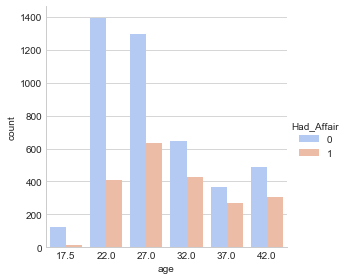

In [17]:
sns.factorplot(x='age', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

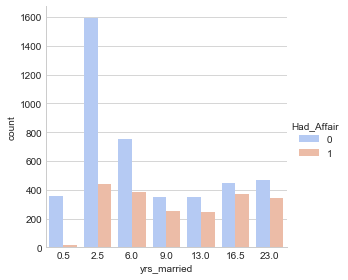

In [18]:
 sns.factorplot('yrs_married', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

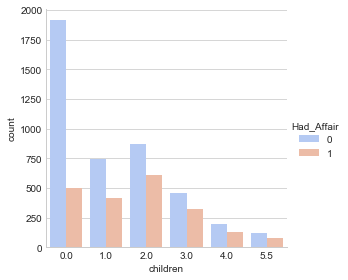

In [19]:
 sns.factorplot('children', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

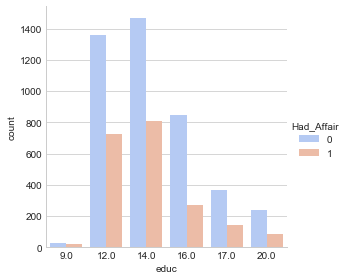

In [20]:
 sns.factorplot('educ', data=df, hue='Had_Affair', palette='coolwarm', kind='count')

In [21]:
import pandas as pd

In [22]:
# Data preparation
# create dummy variables from the categorical data from occupation and occupation_husb
occ_dummy = pd.get_dummies(df['occupation'])

In [23]:
occ_husb_dummy = pd.get_dummies(df['occupation_husb'])

In [26]:
# we need to do this separation beacause the regression is going to get confused 
# it's going to think this isn't a categorical and this will distort the regression
# it's telling the regression that it cannot choose any value along the spectrum, 
# here there is only 6 values and they must be true or false (1 or 0) and there is not 1.5
occ_dummy.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [27]:
# later need to check for multi-collinearity
occ_dummy.columns = ['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
occ_husb_dummy.columns = ['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [28]:
x = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [30]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666


In [35]:
dummies = pd.concat([occ_dummy, occ_husb_dummy], axis=1)

In [36]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [37]:
x = pd.concat([x,dummies], axis=1)

In [38]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
y = df.Had_Affair
y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [40]:
# MultiCollinearity
x = x.drop('occ1', axis=1)
x = x.drop('hocc1', axis=1)

In [41]:
x = x.drop('affairs', axis=1)

In [42]:
x.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [43]:
import numpy as np

In [48]:
from pandas import Series, DataFrame

In [44]:
y = np.ravel(y)
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [45]:
log_model = LogisticRegression()
log_model.fit(x,y)
log_model.score(x,y)

0.7258875274897895

In [46]:
y.mean()

0.3224945020420987

In [55]:
# check the coefficients of our model to check that what seemed to be the stronger predictors
coeff_df = DataFrame(list(zip(x.columns, np.transpose(log_model.coef_)))) 

In [54]:
list(zip(x.columns, np.transpose(log_model.coef_)))

[('rate_marriage', array([-0.69788542])),
 ('age', array([-0.05634703])),
 ('yrs_married', array([0.10390557])),
 ('children', array([0.01817278])),
 ('religious', array([-0.36849605])),
 ('educ', array([0.00878983])),
 ('occ2', array([0.29797858])),
 ('occ3', array([0.60791607])),
 ('occ4', array([0.34603777])),
 ('occ5', array([0.94236514])),
 ('occ6', array([0.90532443])),
 ('hocc2', array([0.21843321])),
 ('hocc3', array([0.32431186])),
 ('hocc4', array([0.18814483])),
 ('hocc5', array([0.21158402])),
 ('hocc6', array([0.21442707]))]

In [57]:
coeff_df

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


In [58]:
# Testing and training
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [59]:
log_model2 = LogisticRegression()
log_model2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
class_predict = log_model2.predict(x_test)

In [61]:
print(metrics.accuracy_score(y_test, class_predict))

0.7324120603015075
